<a href="https://colab.research.google.com/github/ritzx21/Student-Performance-Prediction/blob/main/Student_Performance_Predict%7C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/ritzx21/Student-Performance-Prediction/main/student-mat.csv")

In [47]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [48]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [49]:
df.shape

# .shape gives rows x column

(395, 33)

In [50]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [51]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [52]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [53]:
df.corr()

<ipython-input-53-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<ipython-input-36-412179ef68a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True, cmap = "Greens")


<Axes: >

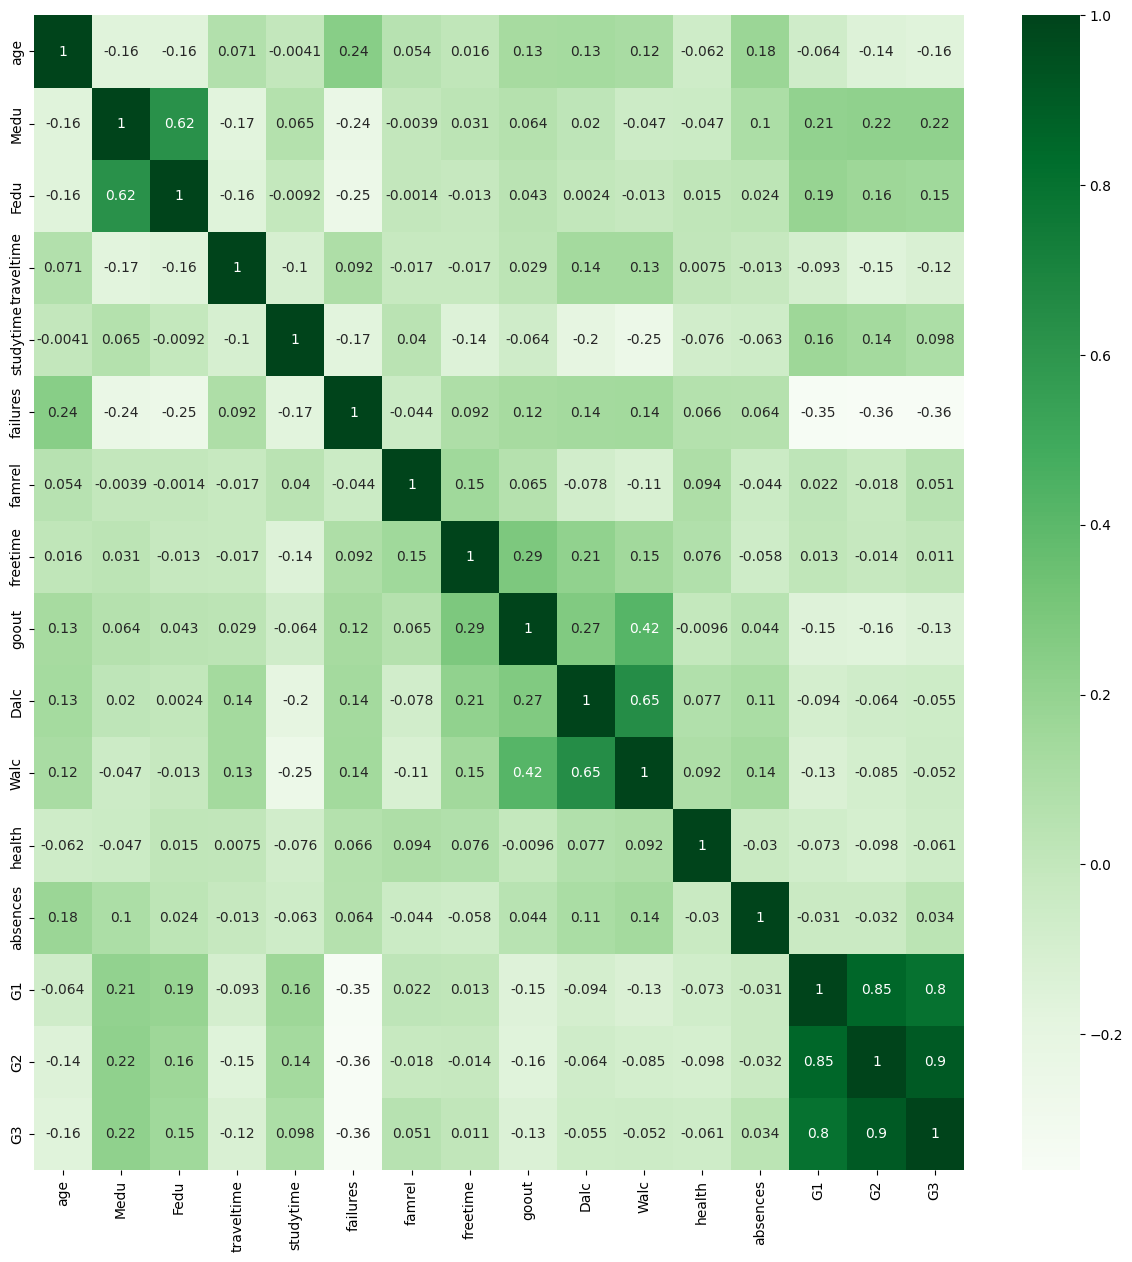

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot = True, cmap = "Greens")

<Axes: >

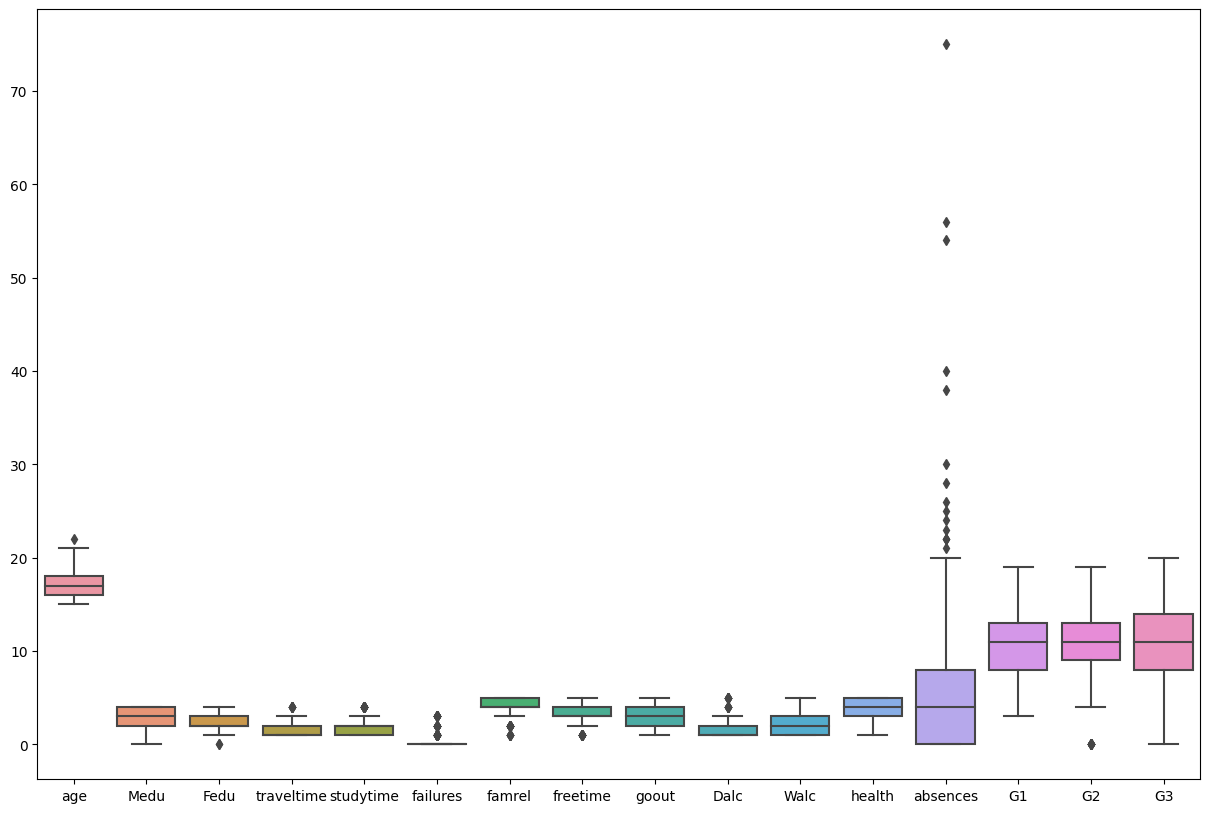

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(df)

<Axes: >

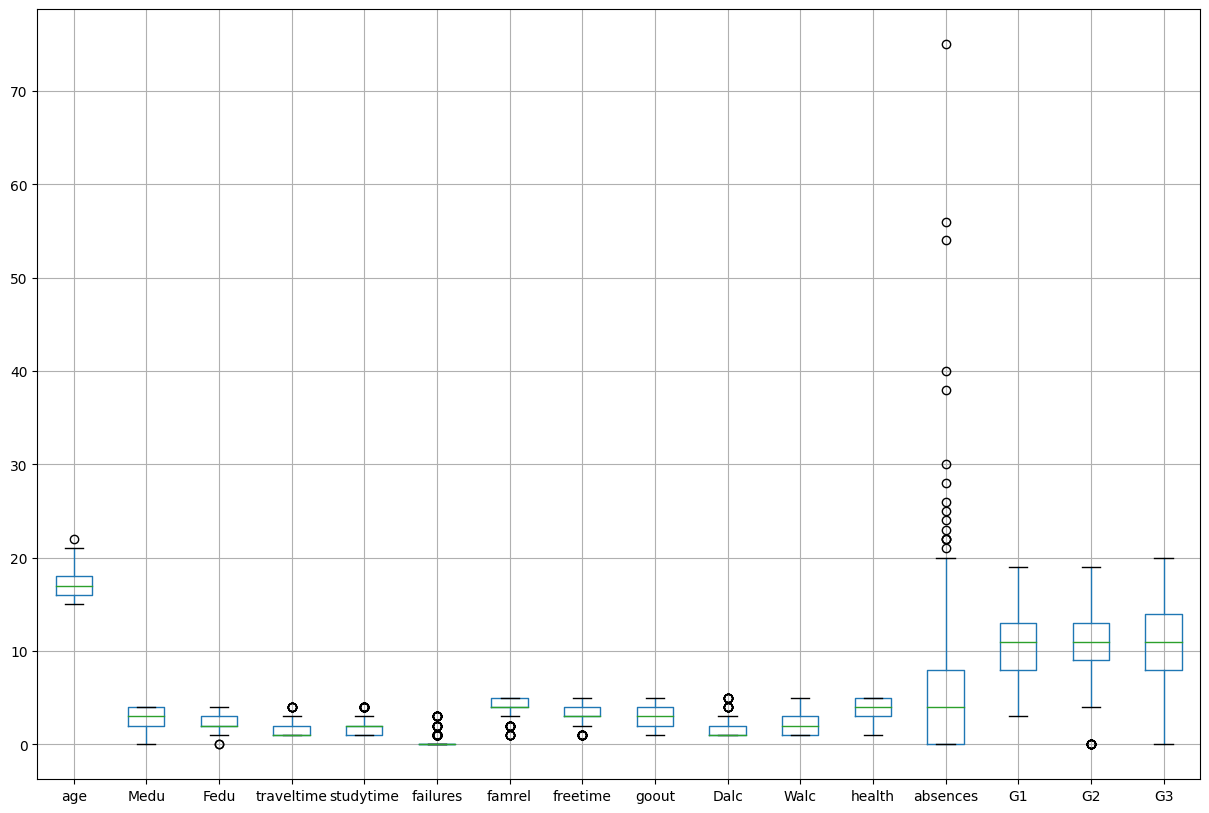

In [ ]:
plt.figure(figsize=(15,10))
df.boxplot()

In [54]:
df.G3.min()

0

In [55]:
df.G2.min()

0

In [56]:
df.G1.min()

3

In [57]:
df.G3.max()

20

In [58]:
df.G3.std()

4.5814426109978434

In [59]:
df.to_csv('Student_data.csv')

Linear Regression model

In [146]:
# X = np.array(df.add('G1',axis=0),('G2',axis=0))
# Y = np.array(df.G3)

NameError: ignored

In [204]:
# use selected columns for X

cols = ['G1','G2','Medu','Fedu','traveltime','studytime','failures','freetime','health','absences','goout','Dalc','Walc']
#cols = ['G1','G2']

df_select = df[cols]

In [205]:
X = np.array(df_select)
Y = np.array(df.G3)

In [129]:
#X = np.array(df.G2)

In [111]:
#X= np.array(df.drop('school',axis = 1))

In [119]:
#X= np.array(df.drop('sex',axis = 1))


In [206]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2,random_state =42)

In [170]:
len(X_train)

316

In [171]:
len(Y_train)

316

In [172]:
len(X_test)

79

In [173]:
len(Y_test)

79

Model

In [174]:
model = LinearRegression()

In [207]:
model.fit(X_train , Y_train)

LinearRegression()

In [208]:
model.intercept_

-2.758826513750101

In [209]:
model.coef_

array([ 0.1351524 ,  0.99811186,  0.10646334, -0.16556403,  0.18743937,
       -0.05268135, -0.50448857,  0.06229247,  0.09363018,  0.0411535 ,
        0.15457592, -0.14545568,  0.03026219])

In [210]:
Y_test

array([10, 12,  5, 10,  9, 13, 18,  6,  0, 14, 15,  7, 15, 10, 14,  8,  8,
       11, 15,  0, 14, 16, 16,  6,  0, 19, 11, 12, 17, 10,  8, 10, 15, 13,
        8,  5,  0, 15, 14,  8,  5, 11, 14,  9, 15, 10, 11, 13, 13, 16, 13,
       15, 12, 10,  6, 12, 11,  0, 16, 17, 14, 10, 10,  6,  9, 17,  8, 10,
        9, 15,  6, 10, 15, 19, 12,  6,  9, 15,  5])

In [211]:
Y_predict = model.predict(X_test)

In [212]:
Y_predict

array([ 5.87742427, 12.25045298,  3.43079101,  8.64131478,  7.72191354,
       12.43892968, 18.7066262 ,  7.30678564,  7.28347038, 12.60368896,
       14.66319134,  6.38458927, 14.04186699, 11.75966944, 14.73317101,
        7.43927336,  6.49348202, 10.87839747, 14.89873729,  8.74845706,
       14.13964512, 16.59657242, 15.03579683,  5.15651912,  7.86299554,
       20.06537172, 10.38012717,  8.77638208, 17.13673107, 11.31764948,
        9.51504688,  7.70782605, 14.82839012, 13.07000862,  5.9965734 ,
        4.03398239, -2.23331206, 14.9019672 , 11.94502888,  7.46604176,
        4.51083914, 10.26614051, 14.19211377,  7.57227733, 15.61388072,
        9.70225178, 12.32004954, 14.49855228, 12.88603322, 15.54494387,
       12.86806621, 14.59068899,  9.99360388,  7.90052714,  4.55461729,
       13.35950575,  9.88959854,  6.09724556, 15.37876652, 16.23607819,
       12.87324608,  8.24094532,  6.90427195,  4.26733073,  5.18687206,
       16.83060869,  8.26185538,  9.69351536,  9.92574036, 15.60

In [213]:
model.score(X_test,Y_test)

0.7730807152782755

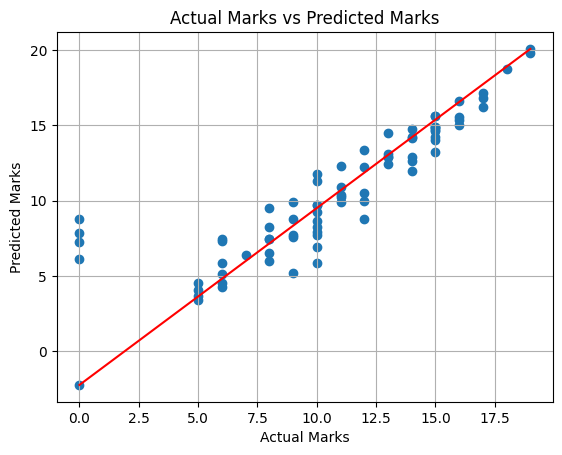

In [214]:
plt.scatter(Y_test,Y_predict)

plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual Marks vs Predicted Marks")

plt.grid()

plt.plot([min(Y_test),max(Y_test)],[min(Y_predict),max(Y_predict)],color = 'red')